In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Data_Files/hly4935.csv', skiprows=23)
df.head()

/var/folders/5f/0bl6by2x4kvfm2sp8x97hcym0000gn/T/ipykernel_59096/3544093815.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data_Files/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246930 entries, 0 to 246929
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    246930 non-null  object 
 1   ind     246930 non-null  int64  
 2   rain    246930 non-null  object 
 3   ind.1   246930 non-null  int64  
 4   temp    246930 non-null  float64
 5   ind.2   246930 non-null  int64  
 6   wetb    246930 non-null  float64
 7   dewpt   246930 non-null  float64
 8   vappr   246930 non-null  float64
 9   rhum    246930 non-null  int64  
 10  msl     246930 non-null  object 
 11  ind.3   246930 non-null  int64  
 12  wdsp    246930 non-null  object 
 13  ind.4   246930 non-null  int64  
 14  wddir   246930 non-null  object 
 15  ww      246930 non-null  object 
 16  w       246930 non-null  object 
 17  sun     246930 non-null  float64
 18  vis     246930 non-null  object 
 19  clht    246930 non-null  object 
 20  clamt   246930 non-null  object 
dtypes: float64

In [ ]:
#Convert the date column to pandas datetime format

df['date'] = pd.to_datetime(df['date'])

df.info()


/var/folders/5f/0bl6by2x4kvfm2sp8x97hcym0000gn/T/ipykernel_59096/2148433997.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246930 entries, 0 to 246929
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    246930 non-null  datetime64[ns]
 1   ind     246930 non-null  int64         
 2   rain    246930 non-null  object        
 3   ind.1   246930 non-null  int64         
 4   temp    246930 non-null  float64       
 5   ind.2   246930 non-null  int64         
 6   wetb    246930 non-null  float64       
 7   dewpt   246930 non-null  float64       
 8   vappr   246930 non-null  float64       
 9   rhum    246930 non-null  int64         
 10  msl     246930 non-null  object        
 11  ind.3   246930 non-null  int64         
 12  wdsp    246930 non-null  object        
 13  ind.4   246930 non-null  int64         
 14  wddir   246930 non-null  object        
 15  ww      246930 non-null  object        
 16  w       246930 non-null  object        
 17  sun     246930 non-null  floa

year
2020    8784
2000    8784
2004    8784
2016    8784
2008    8784
2012    8784
2010    8760
2011    8760
2021    8760
2019    8760
2018    8760
2017    8760
2015    8760
2014    8760
2013    8760
2009    8760
1997    8760
2023    8760
2007    8760
2006    8760
2005    8760
2003    8760
2002    8760
2001    8760
1999    8760
1998    8760
2022    8760
2024    6577
1996    3689
Name: count, dtype: int64


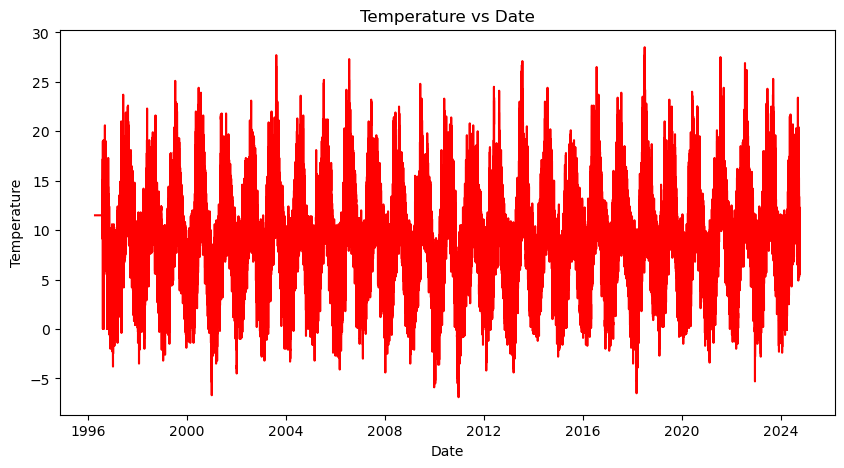

In [12]:
# Seperate out the temperature based on the year

df['year'] = df['date'].dt.year
years = df['year'].value_counts()
unique_years = years.index
print(years)

fig, ax = plt.subplots(figsize=(10, 5))

#plot the temperature vs date graph
ax.plot(df['date'], df['temp'], color='red')
ax.set_title('Temperature vs Date')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.show()

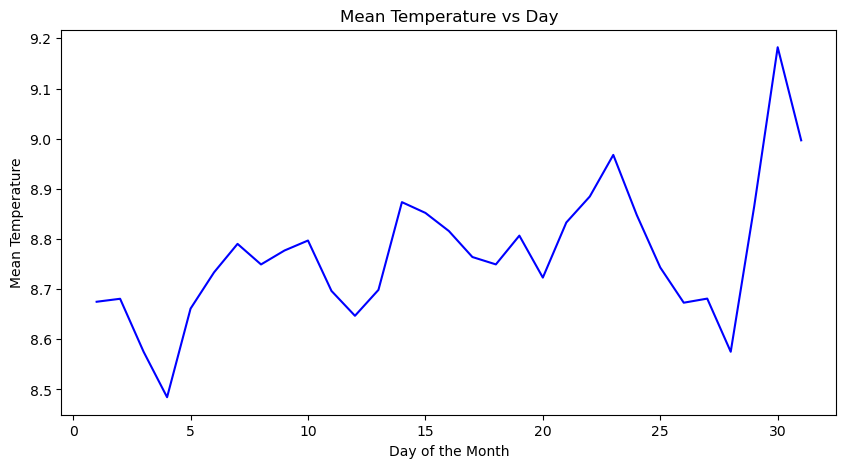

In [17]:
#Plot the mean temperature for each day

day = df['day'] = df['date'].dt.day

mean_temp = df.groupby('day')['temp'].mean()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mean_temp, color='blue')
ax.set_title('Mean Temperature vs Day')
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Mean Temperature')
plt.show()

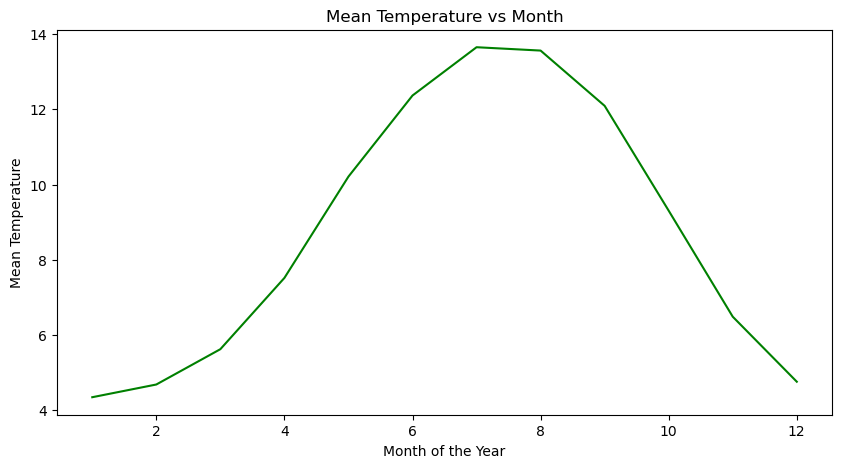

In [18]:
#Plot the mean temperature for each month

month = df['month'] = df['date'].dt.month

mean_temp = df.groupby('month')['temp'].mean()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(mean_temp, color='green')
ax.set_title('Mean Temperature vs Month')
ax.set_xlabel('Month of the Year')
ax.set_ylabel('Mean Temperature')
plt.show()